# Project : Analysis and Modelling of Diabetic probability prediction based on Pima Indian Dataset

1.Objective: To build a model which can be used to predict whether the person is likely to have 
diabetes or not by the attributes from the dataset which is based on research made on a group of 
Females of Pima Indian heritage in America.

2.Attributes in the dataset: 
    
->No of times pregnant (column name : Pregnancies )

->Glucose levels (column name:  Glucose)

->Blood Pressure (column name: Blood pressure)

->Skin Thickness (column name: Skin thickness)

->Insulin (column name: Insulin)

->Body Mass index(column name: BMI)

->Diabetes pedigree function(column name:Diabetes pedigree function)

->Age (column : Age)

->Outcome(column : Outcome)

3.The Project is presented as: 

->Analysis of the Data

->Inference

->Conclusion of the Analysis


In [199]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [200]:
#Load dataset
diapredict=pd.read_csv("diabetes.csv")

# ****Analysis of the data****

with the given data, we can find some observations such as the column names, range of the data in column, 
no of rows and columns,zero values ,statistical parameters such as mean, outliers etc

In [201]:
diapredict.head()
#by using head functionality above,the coloumn names and sample data is analysed
#here from column Pregnancies to Age are independent variables while outcome is target variable column
#outcome 0 indicates non diabetic, 1 indicates diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [202]:
diapredict.info() #indicates no of rows,coloumns, datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


the dataset contains 768 rows with 9 columns

In [203]:
diapredict.describe() 
# by using desctibe function we get statistical data of the dataset such as mean,std deviation,min,max etc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [204]:
# for testing and training purpose we can a make a copy of the data set diapredict as diasample
diasample=diapredict

In [205]:
diasample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [206]:
diasample.describe()
#statistical values of testing dataset diasample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [207]:
#max values of all attributes , as  index value of row "MAX" in describe function is 7 , 
#iloc functionalty is used with index value of 7
diasample.describe().iloc[7]

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
Name: max, dtype: float64

eg: Here max value for Pregnancies column is 17 , while for insulin is 846, for Age is 81

In [208]:
#min values of all atributes
diasample.describe().iloc[3]

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

eg: here min value for Pregnancies is 0 , for insulin is 0 and Age is 21

In [209]:
#Range=max()-min() is calculated on coloumn "Pregnancies"
diasample['Pregnancies'].max()-diasample['Pregnancies'].min()

17

In [210]:
#instead of calculating the range on all the columns seperately iloc functionality is used.
#the index of max and min is 7 and 3.
#the difference between these is returned to a function which then can be called as a function to execute eg:colrange


def colrange(x,y):
    a=diasample.describe().iloc[x]-diasample.describe().iloc[y]
    return(a)
colrange(7,3)

Pregnancies                  17.000
Glucose                     199.000
BloodPressure               122.000
SkinThickness                99.000
Insulin                     846.000
BMI                          67.100
DiabetesPedigreeFunction      2.342
Age                          60.000
Outcome                       1.000
dtype: float64

# Analysis of the data as it is given in the data set by using Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026ED0C01A58>,
      dtype=object)

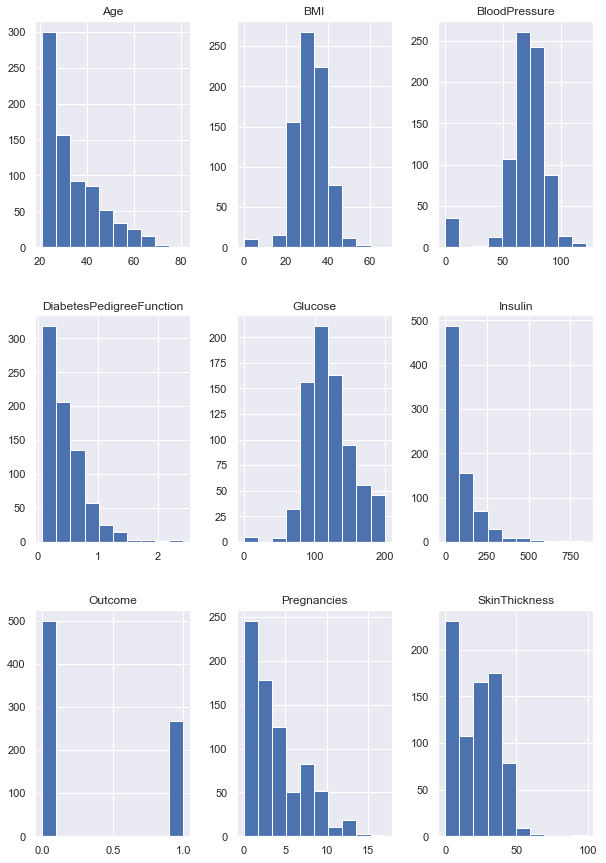

In [211]:
#Histogram
diasample.hist(figsize=(10,15))

Histogram plots the frequency distribution,
the shape of the distribution on BMI appears symmetric ,Glucose and Bloodpressure is Left skewed
while most of the ditributions appears Right skewed

In [212]:
diasample['Pregnancies'].value_counts()
#by using valuecounts no of pregnancies to no of people is calculated 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

for example here from the above output, we can infer that 

135 people in the data set has no of pregnancies value 1

111 people in the data set has no of pregnancies value 0

1 person in the data set has no of pregnancies value 17

In [213]:
# Bivariant Analysis

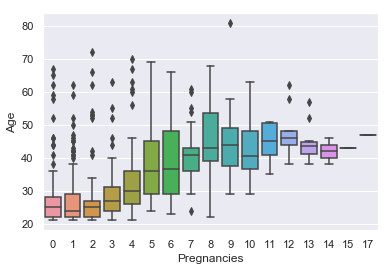

In [214]:
sns.boxplot(diasample['Pregnancies'],diasample['Age'])

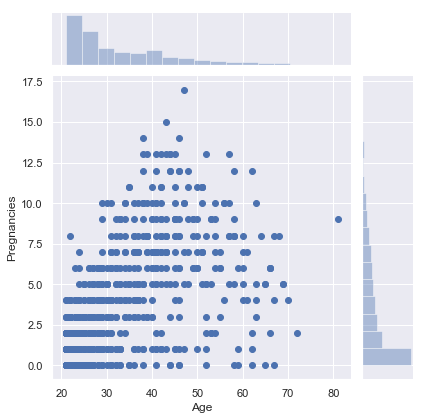

In [215]:
sns.jointplot(diasample['Age'],diasample['Pregnancies'])

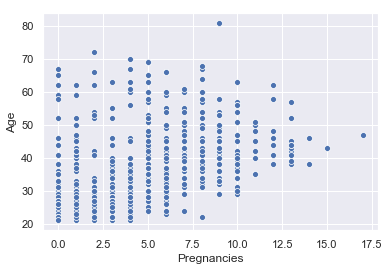

In [216]:
sns.scatterplot(diasample['Pregnancies'],diasample['Age'])

In [217]:
diasample[diasample['Pregnancies']==17]['Age']

159    47
Name: Age, dtype: int64

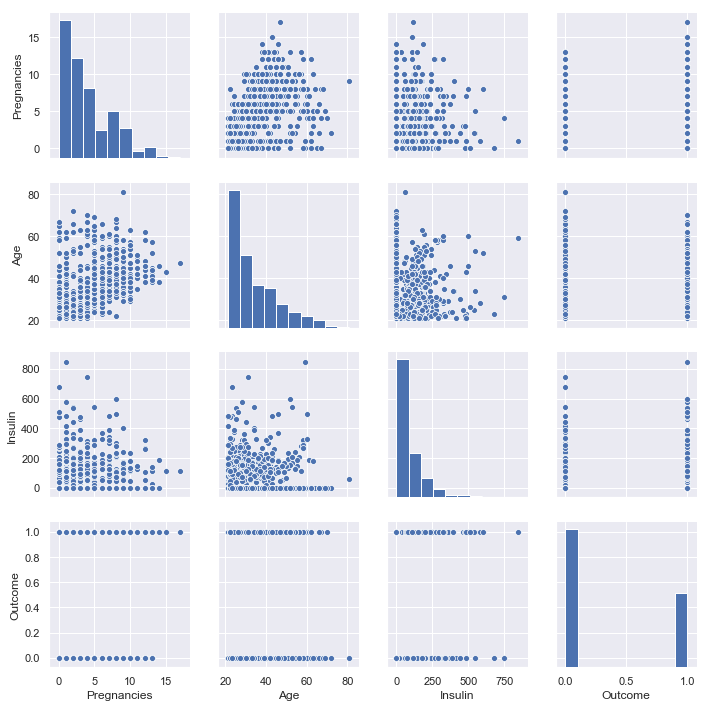

In [218]:
sns.pairplot(diasample[['Pregnancies', 'Age', 'Insulin','Outcome']])

In [219]:
#corr function is used to understand the relationship between attributes
corr = diasample.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


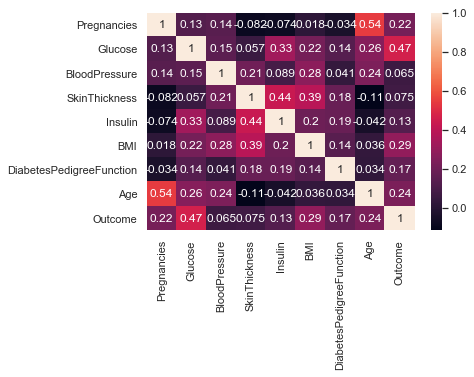

In [220]:
sns.heatmap(corr, annot=True)

# INFERENCE

1.Inference from the plots

from the box plot between attributes Pregnancies and Age, 
we can infer that there are Outliers present between the age group 40's to 80's which is 
above the largest values of the box plots and  one outlier value below the smallest value of box plot

from the plots like Joint, scatter and pair plot above , 
the inference is that the data is more populated between the age group 20's to around 50's


2.Inference from the Heatmap
    
    -> The Value 1 indicates strong corelation between two variable and 0 indicates weak corelation
    -> Between the independent attributes:
        
    Good correlation is between 
    1.Pregnancies and Age
    2.Glucose and Insulin
    3.Skin Thickness and Insulin
    4.BMI and Skin Thickness
    
    -> Between Independent attributes such as Age, Glucose,Pregnancies and Dependent attribute like Target Variable Outcome:
        
    Good correlation is between 
    1.Glucose levels and Outcome
    2.BMI and Outcome
    
3.Missing Data    
    
we can infer that the data set contains 0 values in the column pregnancies, insulin, skin thickness, bloodpressure 
while it is assumed that zero pregnancies in pregnancies column indicate no of pregnancies as zero 
for a person analysed in this dataset.

zero values on glucose , insulin, skin thickness, bloodpressure might indicate some missing data 

Hence zero values in some columns can be replaced by some constant value

while there are many methods to replace zero values in dataset, 
the method which is followed in this project is to replace the zero values by mean

In [221]:
# for testing this scenario to analyse by replacing zeros by constant value of that particular column, 
# the dataset is loaded into another parameter diasample2 from the parameter diapredict
# which was originally loaded into at the beginning of the project 

diasample2=diapredict
diasample2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [222]:
diasample2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [223]:
# No of zero values in coloumns
# zero values in pregnancies column is ASSUMED to be zero pregnacies for the person in the dataset 
diasample2[diasample2==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [224]:
#verifying the above data to find the number of zeros
diasample2[diasample2['Glucose']==0]
# the number of zeros in Glucose column matches with  previous data obtained by using count function 
# i.e: 5 zero values in glucose column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [225]:
diasample2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [226]:
# from the heatmap we observed that for outcome attribute, Glucose and BMI has strong corelation.
# hence we shall analyse by replacing zero values with mean of Glucose and BMI 
# Mean values of Glucose is 120.89 and BMI is 31.99

In [227]:
diasample2['Glucose']=diasample2['Glucose'].replace(0,120.894531)
diasample2['BMI']=diasample2['BMI'].replace(0,31.992578)
corr=diasample2.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.141282,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.158279,0.074934,0.331190,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.141282,0.158279,1.000000,0.207371,0.088933,0.184252,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.074934,0.207371,1.000000,0.436783,0.381755,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331190,0.088933,0.436783,1.000000,0.185365,0.185071,-0.042163,0.130548
BMI,0.021546,0.231478,0.184252,0.381755,0.185365,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.041265,0.183928,0.185071,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.239528,-0.113970,-0.042163,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.065068,0.074752,0.130548,0.312254,0.173844,0.238356,1.000000


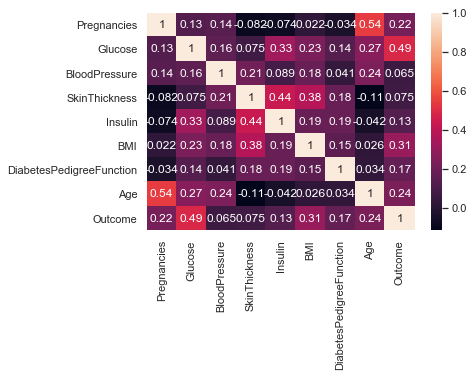

In [228]:
sns.heatmap(corr,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026ED34D4470>,
      dtype=object)

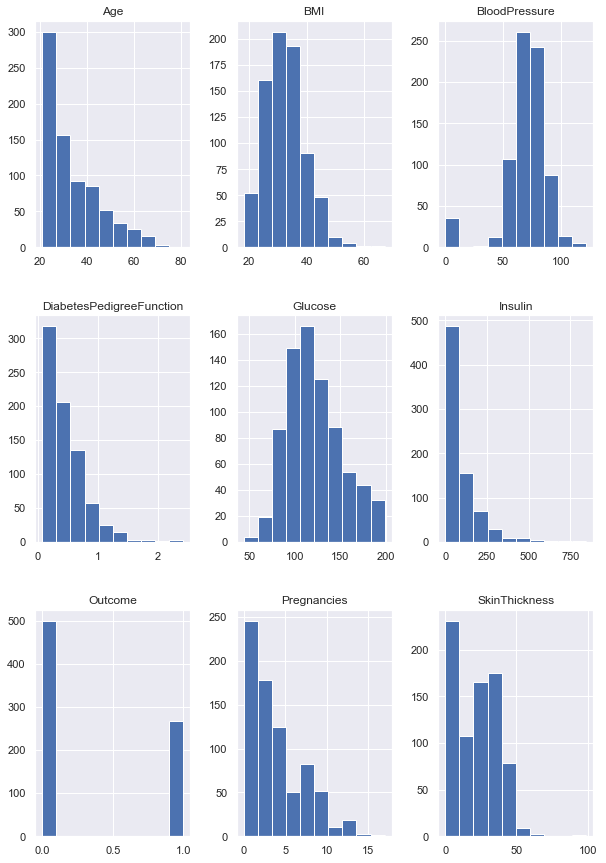

In [229]:
diasample2.hist(figsize=(10,15))

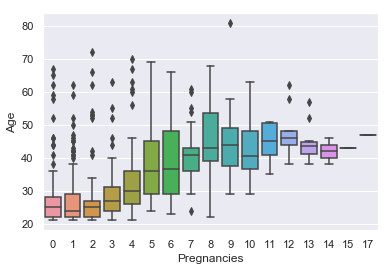

In [230]:
sns.boxplot(diasample2['Pregnancies'],diasample2['Age'])

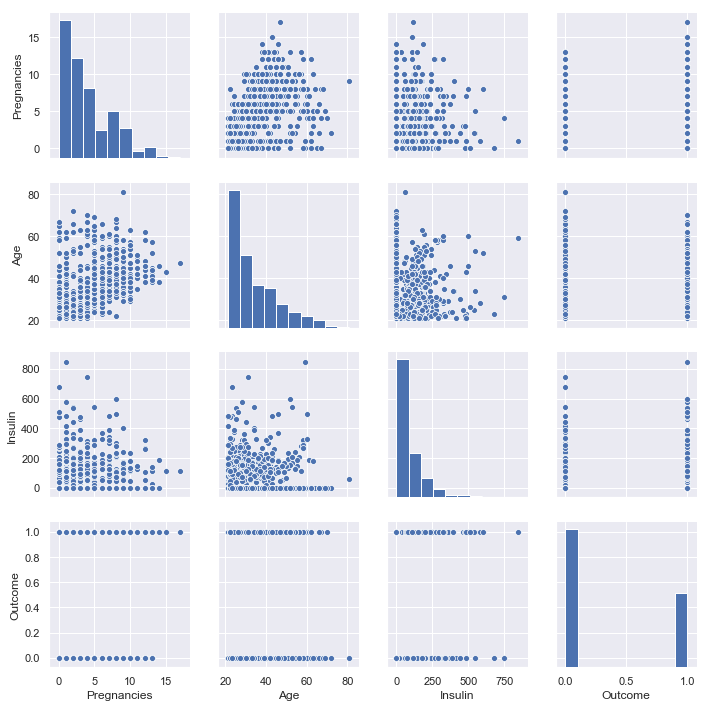

In [231]:
sns.pairplot(diasample2[['Pregnancies', 'Age', 'Insulin','Outcome']])

Plots are almost identical to values before replacing the mean in Glucose and BMI column

# Conclusion of the Analysis:

After Replacing Mean value in Glucose and BMI column which has good co relation between Outcome among other attributes
the corelation values in outcome is only slightly increased

i.e before replacing Mean values in Glucose and BMI 

the co relation between Outcome and Glucose attribute was 0.47
the co relation between Outcome and BMI was 0.29

after replacing mean values in Glucose and BMI

the co relation between Outcome and Glucose attribute is 0.49
the co relation between Outcome and BMI was 0.31

the values in Insulin was Not replaced in this project,
since the number of zeros is more in number and by replacing it with zeros 
it would change the entire structure of the outcome

So Since the dataset is huge in number replacing certain amount of data with Mean values 
doesnt alter the structure of outcome, hence other methods to replace zero values may be of use

Hence the Good predictors of the Outcome according to analysis made here are 

1. Glucose 
2. BMI
3. No of Pregnancies 
4. Age